# One-sample z-test:

* Test whether the mean of a population is greater than, less than or not equal to a specific value.
* The test assummes that the population standard deviation is known.
* The data in the population is approximatelly normally distributed.

<b> Formula: </b>
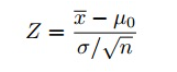

In [1]:
path = "https://assets.datacamp.com/production/repositories/5982/datasets/c59033b93930652f402e30db77c3b8ef713dd701/stack_overflow.feather"

import pandas as pd
import numpy as np
from scipy.stats import norm

stack_overflow = pd.read_feather(path)

# Hypothesis(null) : The mean annual compensation of the population of data scientists is $ 110,000.
# Hypothesis(alternative): The mean annual compensation of the population of data scientists is more than|less|not equal -
# to $110,000.
# --------------------------------------------------------------------------------

# alpha : 0.05
alpha = 0.05

# calculate sample mean:(x_bar)
sample_mean = stack_overflow["converted_comp"].mean()

# null hypothesis:(u_0)
null_hypothesis = 110000

# calculate standard error: (2 way)

# first(boostrap)
boostrap = [stack_overflow.sample(frac=1, replace=True)["converted_comp"].mean() for i in range(5000)]
standard_error_1 = np.std(boostrap, ddof=1)

# second(formula)
standard_deviation = np.std(stack_overflow["converted_comp"])
data_length = len(stack_overflow)
standard_error_2 = standard_deviation / np.sqrt(data_length)

# calculate z-score.
z_score_1 = (sample_mean - null_hypothesis) / standard_error_1
z_score_2 = (sample_mean - null_hypothesis) / standard_error_2

##  calculate p-value.(right-tailed test, left-tailed test and 2 tailed test)


# right tailed.
p_value_right = 1 - norm.cdf(z_score_1, loc=0, scale=1)

# left tailed.
p_value_left = norm.cdf(z_score_1, loc=0, scale=1)

# not equal to 110.000
p_value_not_equal = (2 * (1 - norm.cdf(z_score_1, loc=0, scale=1)))

print("p-value right tailed: {}\tp-value<alpha: {}".format(p_value_right, p_value_right<alpha))
print("p-value left tailed: {}\t\tp-value<alpha: {}".format(p_value_left, p_value_left<alpha))
print("p-value not equal: {}\t\tp-value<alpha: {}".format(p_value_not_equal, p_value_not_equal<alpha))

p-value right tailed: 0.04204047982551029	p-value<alpha: True
p-value left tailed: 0.9579595201744897		p-value<alpha: False
p-value not equal: 0.08408095965102058		p-value<alpha: False


In [2]:
# use statsmodels for one-sample z-test:
from statsmodels.stats.weightstats import ztest

right_tailed_ztest = ztest(x1 = stack_overflow["converted_comp"], value=110000, alternative="larger", ddof=1)
left_tailed_ztest = ztest(x1 = stack_overflow["converted_comp"], value=110000, alternative="smaller", ddof=1)
not_equal_ztest = ztest(x1 = stack_overflow["converted_comp"], value=110000, alternative="two-sided", ddof=1)

print("p-value right tailed: {}\tp-value<alpha: {}".format(right_tailed_ztest[1], right_tailed_ztest[1]<alpha))
print("p-value left tailed: {}\t\tp-value<alpha: {}".format(left_tailed_ztest[1], left_tailed_ztest[1]<alpha))
print("p-value not equal: {}\t\tp-value<alpha: {}".format(not_equal_ztest[1], not_equal_ztest[1]<alpha))

p-value right tailed: 0.04322480095025359	p-value<alpha: True
p-value left tailed: 0.9567751990497464		p-value<alpha: False
p-value not equal: 0.08644960190050718		p-value<alpha: False


# One-sample t-test:

* The variable under study should have no outliers.
* The variable under study should be approximately normally distributed.
* The observations in the sample should be independent.
* Standard deviation is unknown.

<b>Formula:</b>
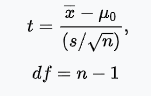

In [3]:
from scipy.stats import ttest_1samp

data = [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14]

# h0: The height of this speciies plant is 15 inches.
# h1: less | more | not equal.


# alpha: 0.1
alpha = 0.1

# a = sample observation.
# popmean = null hypothesis(expected value)
# alternative = altenative hypothesis.
left = ttest_1samp(a=data, popmean=15, alternative = "less")
right = ttest_1samp(a=data, popmean=15, alternative = "greater")
two_sided = ttest_1samp(a=data, popmean=15, alternative = "two-sided")

print("p-value right tailed: {}\tp-value<alpha: {}".format(right[1], right[1]<alpha))
print("p-value left tailed: {}\tp-value<alpha: {}".format(left[1], left[1]<alpha))
print("p-value not equal: {}\t\tp-value<alpha: {}".format(two_sided[1], two_sided[1]<alpha))

p-value right tailed: 0.9399276962875095	p-value<alpha: False
p-value left tailed: 0.060072303712490505	p-value<alpha: True
p-value not equal: 0.12014460742498101		p-value<alpha: False


In [4]:
# calculate using formula.

# sample mean:
x_bar = np.mean(data)

# null hypothesis:
null_hypothesis = 15

# standard deviation of sample data.
std = np.std(data, ddof=1)

# square of length data.
sqrt_length_dt = np.sqrt(len(data))

# standard_error
standard_error = std / sqrt_length_dt

# t-test:
t_test = (x_bar - null_hypothesis) / standard_error

from scipy.stats import t

degrees_of_freedom = len(data) - 1

right = 1 - t.cdf(t_test, loc=0, scale=1, df = degrees_of_freedom)
left = t.cdf(t_test, loc=0, scale=1, df=degrees_of_freedom)
two_sided = 2 -  (2 * (1 - t.cdf(t_test, loc=0, scale=1, df=degrees_of_freedom)))

print("p-value right tailed: {}\tp-value<alpha: {}".format(right, right<alpha))
print("p-value left tailed: {}\tp-value<alpha: {}".format(left, left<alpha))
print("p-value not equal: {}\t\tp-value<alpha: {}".format(two_sided, two_sided<alpha))

p-value right tailed: 0.9399276962875094	p-value<alpha: False
p-value left tailed: 0.060072303712490574	p-value<alpha: True
p-value not equal: 0.12014460742498123		p-value<alpha: False


# One-proportion z-test:

The one-proportion z-test is a statistical test used to determine if the proporations of categories in a single qualitative variable significantly differ from an expected or known population proportion.

<b>Formula:</b>

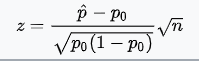

In [5]:
# Example: stack_overflow data age categories.

# ---------------------------------------------
# H0: Proportion of stack overflow users under thirty = 0.5
# H1: Proportion of stack overflow users under thirty != 0.5
# ---------------------------------------------

import pandas as pd
import numpy as np
from scipy.stats import norm

# define significance level(alpha): 0.01
alpha = 0.01

# define proportion of observation of "under 30"
p_hat = (stack_overflow["age_cat"] == "Under 30").mean()

# define null hypothesize for proportion.
p_0 = 0.5

# calculate denominator of formula:
denominator = np.sqrt(p_0 * (1 - p_0) / len(stack_overflow))

# find z-score for one-proportion :
z_score = (p_hat - p_0) / denominator

# find p-value: (right, left, two-sided)
p_value_right = 1 - norm.cdf(z_score, loc=0, scale=1)
p_value_left = norm.cdf(z_score, loc=0, scale=1)
p_value_two_sided = (2 * (1 - norm.cdf(z_score, loc=0, scale=1)))

print("p-value right tailed: {}\tp-value<alpha: {}".format(p_value_right, p_value_right<alpha))
print("p-value left tailed: {}\t\tp-value<alpha: {}".format(p_value_left, p_value_left<alpha))
print("p-value not equal: {}\tp-value<alpha: {}".format(p_value_two_sided, p_value_two_sided<alpha))

p-value right tailed: 0.00035471136840503625	p-value<alpha: True
p-value left tailed: 0.999645288631595		p-value<alpha: False
p-value not equal: 0.0007094227368100725	p-value<alpha: True


# Two samples Z-test for means:

<b>Formula:</b>
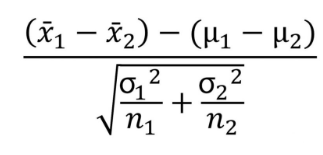

* A two sample z-test is used to test whether two population means are equal.
* This test assumes that the standard deviation of each population is known.
* If the population standard deviation is known and sample size greater than 30, z-test is recommended.
* If the population standard deviation is known but sample size less than or equal to 30, not recommonded.
* If the population standard deviation is unknown , not recommended.
****
<b>Assumptions:</b>
* The data from each population are continuous.
* The data in each population is approximately normally distributed.
* The population standard deviations are known.

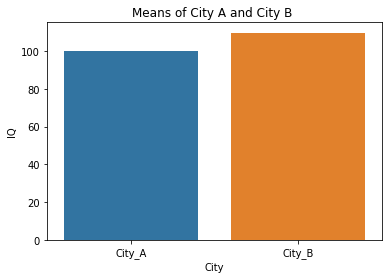

,z_test,p_values,alpha,alternatives,success,reject or failed to reject
0,-2.047159,0.979679,0.05,right-tailed,False,Fail to reject
1,-2.047159,0.020321,0.05,left-tailed,True,Reject null hypothesis
2,-2.047159,0.040642,0.05,two-sided,True,Reject null hypothesis


In [6]:
# Without using library.

import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

# H0: Mean of IQ level in city A and B is equal.
# H1: Mean of IQ level in city A and B is not euqal.| A is larger than B | A is smaller than B.


# Define alpha value
alpha = 0.05


def z_test_two_sample(group_1, group_2, alpha):
    
    x_1 = np.mean(group_1)
    x_2 = np.mean(group_2)
    
    d_0 = 0
    
    std_1 = np.std(group_1)
    std_2 = np.std(group_2)
    
    n1 = len(group_1)
    n2 = len(group_2)
    
    numerator = (x_1 - x_2) - d_0
    
    denominator = np.sqrt((np.square(std_1) / n1) + (np.square(std_2) / n2))
    
    z_test = numerator / denominator
    
    
    # calculate p-values
    p_value_right = 1 - norm.cdf(z_test, loc = 0, scale = 1)
    p_value_left = norm.cdf(z_test, loc = 0, scale = 1)
    p_value_two_sided = 2 - (2 * (1 - norm.cdf(z_test, loc = 0, scale=1)))
    
    # compare with alpha
    right_tailed_check = p_value_right < alpha
    left_tailed_check = p_value_left < alpha
    two_sided_check = p_value_two_sided < alpha
    
    # create a dataframe result table.
    
    r = [right_tailed_check, left_tailed_check, two_sided_check]
    
    res = {"z_test": [z_test for i in range(3)],
         "p_values": [p_value_right, p_value_left, p_value_two_sided],
         "alpha": [alpha for i in range(3)],
         "alternatives": ["right-tailed", "left-tailed", "two-sided"],
         "success": [right_tailed_check, left_tailed_check, two_sided_check],
         "reject or failed to reject": ["Reject null hypothesis" if i == True  else "Fail to reject" for i in r]}
    
    
    # Create bar plot of means of group 1 and group 2.
    
    n = len(group_1) + len(group_2)
    
    d = {"IQ": cityA + cityB, "City": ["City_A" if i <= 20 else "City_B" for i in range(n)]}
    
    data = pd.DataFrame(d)
    
    data = data.groupby("City")["IQ"].mean().reset_index()
    
    sns.barplot(data = data, x = "City", y = "IQ")
    plt.title("Means of City A and City B ")
    
    plt.show()
    
    results = pd.DataFrame(res)
    
    
    
    return results
            

z_test_two_sample(group_1 = cityA, group_2 = cityB, alpha = alpha)

In [7]:
# use statsmodel for two sample z-test

from statsmodels.stats.weightstats import ztest

ztest(x1 = cityA, x2 = cityB, value = 0, alternative = "two-sided")

(-1.9953236073282115, 0.046007596761332065)

# Two sample pooled t-test(independent samples t-test)

Conditions for t test:
* Each observation should be independent of other.
   * Sampling with replacement.
   * If sampling without replacement, the sample size should not be more than 10 % of the population.
* Sampling distribution approximates Normal Distribution.
   * Population is Normally distributed and the standard deviation is unkown and sample size < 30.

If two set of <b>data are indepedent</b>, if the values in one sample reveal(ortaya çıkarmak) no information about those of the other sample, then the samples are independent.(Volume produced by two machines. )(two sample t-test)

If the values in one sample affect the values in the other sample, then the <b>samples are dependent</b>. ( Example: Blood pressure before and after a specific medicine )(paired t-test)

<b>Formula:</b>

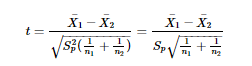
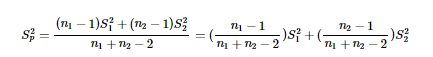

In statistics, the two sample t-test for independent samples is a type of hypothesis test that can be used to determine whether the means of two populations are statistically different given the two samples are independent and have normal distributions.
* Independent t-tests assumes that two samples are equal variance.
* We can do two variance test is for checking the variance is equal or not. If the variances are equal then we should conduct the eqaul variances t-test, if not, then should conduct the unpooled(not equal variance) test.

<b>Examples:</b>
* Comparing the average test scores of two classes from two different schools.
* Comparing the average weights of two different independent groups.
* Determining whether the medication have the same efficacy on two different or indepedent groups of people.

The feeding habits of two species of net-casting spiders are studied. The species, the deinopis and menneus, coexist in eastern Australia. The following data were obtained on the size, in millimeters, of the prey of random samples of the two species:

In [8]:
deinopis = np.array([12.9,10.2,7.4,7.0,10.5,11.9,7.1,9.9,14.4,11.3])
menneus = np.array([10.2,6.9,10.9,11.0,10.1,5.3,7.5,10.3,9.2,8.8])

# --------------------------------
# We assumae that equal variance.
# we use two sample pooled t-test.
# ---------------------------------

# H0: deinopis and menneus has same mean of height.
# H1: deionopis != menneus.
# -------------------------------------------

# alpha : 0.05
alpha = 0.05

from scipy.stats import ttest_ind

t_test, p_value = ttest_ind(a = deinopis, b = menneus, equal_var=True, alternative="two-sided")

print(p_value,t_test)
p_value < alpha
# fail to reject null hypothesis.

0.22900078577218805 1.2452689491491107


False

In [9]:
# use statsmodels for pooled two sample t-test.

from statsmodels.stats.weightstats import ttest_ind

t_test, p_value, df = ttest_ind(x1 = deinopis, x2 = menneus, usevar="pooled", alternative="two-sided", value=0)

print(p_value, t_test)
p_value < alpha

0.2290007857721886 1.245268949149109


False

In [10]:
import numpy as np
from scipy.stats import t


# numerator side:
numerator = (np.mean(deinopis) - np.mean(menneus)) - 0

# denominator side:
n1 = len(deinopis)
n2 = len(menneus)

# df
df = n1 + n2 - 2

first = (n1 - 1) * (np.std(deinopis, ddof=1))**2
second = (n2 - 1) * (np.std(menneus, ddof=1))**2

S_p_2 = first / df + second / df


denominator = np.sqrt(S_p_2 * (1/n1 + 1/n2))

t_test = numerator / denominator

p_value = 2 * (1 - t.cdf(t_test, loc=0, scale=1, df = df))

p_value < alpha

False

# Two sample unpooled t-test( unequal variance )

* Welch's t-test | unequal variances t-test, is a two sample location test which is used to test the hypothesis that two populations have equal means.
***
<b>Formula:</b>
* Student's t-test assumes that the sample means being compared for two populations are normally distributed.
* Populations have equal variances. Welch's t-test is designed for unequal variances, but the assumption of normality is maintened.

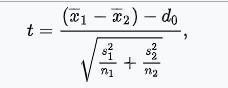
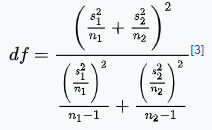

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import ttest_ind as scipy_ttest
from statsmodels.stats.weightstats import ttest_ind

# H0: (age_first_code == child) data scientists have same mean annual compensation with (age_first_code == adult)
# H1: (age_first_code == child) data scientists don't have same mean annual compensation with (age_first_code == adult)
# -------------------------------------------------------------------------------------------------------

# In here, we have two samples and these samples do not have same variances.
# so we should welch's t-test or another name is unequal variance t-test.
# -------------------------------------------------------------------------

# define alpha.
alpha = 0.05

## First, calculate t-test.

# sample means.
x_bar_child = stack_overflow.groupby("age_first_code_cut")["converted_comp"].mean()[1]
x_bar_adult = stack_overflow.groupby("age_first_code_cut")["converted_comp"].mean()[0]

# null hypothesis ( we assume do not have difference.)
d_0 = 0

# sample standard deviations.
s_child = stack_overflow.groupby("age_first_code_cut")["converted_comp"].std(ddof = 1)[1]
s_adult = stack_overflow.groupby("age_first_code_cut")["converted_comp"].std(ddof = 1)[0]

# n1 and n2
n_child = stack_overflow[stack_overflow["age_first_code_cut"] == "child"].shape[0]
n_adult = stack_overflow[stack_overflow["age_first_code_cut"] == "adult"].shape[0]

# numerator
numerator = (x_bar_child - x_bar_adult) - d_0

# denominator
denominator = np.sqrt((np.square(s_child) / n_child) + (np.square(s_adult) / n_adult))

# t_test
t_test = numerator / denominator

## Second, calculate p-value for two-sided.

df_numerator = np.square((np.square(s_child) / n_child) + (np.square(s_adult) / n_adult))
df_denominator = (np.square(np.square(s_child) / n_child) / (n_child - 1)) + (np.square(np.square(s_adult) / n_adult) / (n_adult - 1))

df = df_numerator / df_denominator

# find two-sided p
p_value = 2 * (1 - t.cdf(t_test, loc=0, scale=1, df = df))

p_value < alpha

False

In [12]:
# use scipy library for two-sided unequal variance t-test.

x = stack_overflow[stack_overflow["age_first_code_cut"] == "child"]["converted_comp"]
y = stack_overflow[stack_overflow["age_first_code_cut"] == "adult"]["converted_comp"]


t_test, p_value = scipy_ttest(a = x, b = y, equal_var = False, alternative="two-sided")

p_value < alpha

False

In [13]:
# use statsmodels library for same parametric test statistics.

t_test, p_value, df = ttest_ind(x1 = x, x2 = y, alternative = "two-sided", usevar="unequal")

p_value < alpha

False

In [14]:
# False, means that p_value is not smaller than alpha value, so since p-value is not within the rejected area, 
# we should say faild to reject null hypothesis.

# for 0.05 alpha value evidence there is no difference between the data scientists who started as a child and adult.

# Paired t-test

If the values in one sample affect the values in other sample, then the samples are dependent. 
  * Example: Blood pressure before and after a specific medicine.
  ***

* The paired t-test is a method used to test whether the mean difference between pairs of measurements is zero or not.
* You can use the test when your data values are paired measurements. For example, you might have before-and-after measurements for a group of people.
* Also, the distribution of differences between the paired measurements should be normally distributed.

<b>Formula:</b>
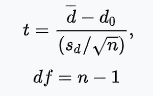

* Find the difference between two set of readings as d1, d2...... dn.
* Find the mean and standard deviation of these differences.

In [15]:
import pandas as pd

repub_votes_potus_08_12 = pd.read_feather("repub_votes_potus_08_12.feather")

repub_votes_potus_08_12.head()

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


In [16]:
# Hypothesis : Was the percentage of Republican candidate votes lower in 2008 than 2012 ?

# define alpha
alpha = 0.05

repub_votes_potus_08_12["diff"] = repub_votes_potus_08_12["repub_percent_08"] - repub_votes_potus_08_12["repub_percent_12"]

d_bar = repub_votes_potus_08_12["diff"].mean()

d_0 = 0

s_d = repub_votes_potus_08_12["diff"].std(ddof=1)

n = len(repub_votes_potus_08_12["diff"])

numerator = d_bar - d_0

denominator = s_d / np.sqrt(n)

paired_t_test = numerator / denominator

paired_t_test

-5.601043121928492

In [17]:
# Calculate p-value for less than(left tailed)

from scipy.stats import t

degree_of_freedom = n - 1

p_value = t.cdf(paired_t_test, loc=0, scale=1, df = degree_of_freedom)

p_value < alpha # reject the null hypothesis.

True

In [18]:
# use scipy for paired t-test.

from scipy.stats import ttest_rel

paired_t_test, p_value = ttest_rel(a = repub_votes_potus_08_12["repub_percent_08"], 
                                   b = repub_votes_potus_08_12["repub_percent_12"],
                                   alternative="less")

p_value < alpha

True

In [19]:
from pingouin import ttest

result = ttest(x=repub_votes_potus_08_12["repub_percent_08"],
         y=repub_votes_potus_08_12["repub_percent_12"],
         alternative="less",
         paired=True)

result["p-val"] < alpha

T-test    True
Name: p-val, dtype: bool

# Two proportions z-test.(pooled)

* Two sample Z test of proportions is the test to determine whether the two populations differ significantly on specific characteristics. 
* In other words, compare the proportion of two different populations that have some single characteristics.
***
<b>Assumptions:</b>
* Both populations follow a binomial distribution. The data contains only two categories, such as pass/fail or yes/no.
* Samples are independent of each other.
* Test results are accurate when <b>n x p</b> and <b>n x (1 - p)</b> are greater than 5, in some books it is 10.
* Random samples.

<b>Formula:</b>
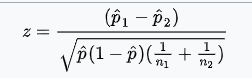
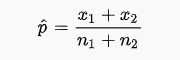

#### For pooled two proportions:
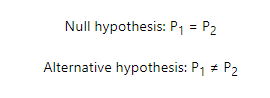

<b>Important:</b>
* In pooled two proportions t-test, null hypothesis and alternative hypothesis hypothesize that the p1 and p2 is equal or not. This is difference from the unpooled method.

In [20]:
path = "https://assets.datacamp.com/production/repositories/5982/datasets/c59033b93930652f402e30db77c3b8ef713dd701/stack_overflow.feather"

import pandas as pd

stack_overflow = pd.read_feather(path)

stack_overflow.head(3)

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30


In [21]:
# H0: Proportion of hobbyist users under thirty age equals to at least thirty users.
# H1: Proportion of hobbyist users under thirty age is different from at least thirty.
# ----------------------------------------------------------------------------------

In [22]:
stack_overflow[["hobbyist", "age", "age_first_code_cut", "age_cat"]]

,hobbyist,age,age_first_code_cut,age_cat
0,Yes,34.0,adult,At least 30
1,Yes,53.0,child,At least 30
2,Yes,25.0,child,Under 30
3,Yes,41.0,adult,At least 30
4,No,28.0,adult,Under 30
...,...,...,...,...
2256,Yes,40.0,child,At least 30
2257,Yes,23.0,child,Under 30
2258,Yes,27.0,child,Under 30
2259,Yes,33.0,child,At least 30


In [23]:
# p1
p1_under_30 = stack_overflow.groupby("age_cat")["hobbyist"].value_counts(normalize=True)[("Under 30", "Yes")]

p1_under_30

0.8431048720066061

In [24]:
# p2
p2_at_least_30 = stack_overflow.groupby("age_cat")["hobbyist"].value_counts(normalize=True)[("At least 30", "Yes")]

p2_at_least_30

0.7733333333333333

In [25]:
# n1
under_30_group_size = stack_overflow.groupby("age_cat")["hobbyist"].count()["Under 30"]

under_30_group_size

1211

In [26]:
# n2
at_least_30_group_size = stack_overflow.groupby("age_cat")["hobbyist"].count()["At least 30"]

at_least_30_group_size

1050

In [27]:
import numpy as np

# calculate standard error (denominator side)

# calculate x1 and x2
x1 = stack_overflow.groupby("hobbyist")["age_cat"].value_counts()[("Yes", "Under 30")]
x2 = stack_overflow.groupby("hobbyist")["age_cat"].value_counts()[("Yes", "At least 30")]

# calculate p_hat.
p_hat = (x1 + x2) / (under_30_group_size + at_least_30_group_size)

standard_error = np.sqrt(p_hat * (1 - p_hat) * (1/under_30_group_size + 1/at_least_30_group_size))

standard_error

0.016519089824430542

In [28]:
# calculate numerator side.
numerator = (p2_at_least_30 - p1_under_30)


# calculate z_test.
z_test = numerator / standard_error

z_test

-4.223691463320559

In [29]:
# calculate p-value(two tailed z-test)
from scipy.stats import norm

# two tailed test.(right tail + left tail is subtracted by interval range.)
p_value = 2 * (1 - norm.cdf(abs(z_test), loc=0, scale=1))

p_value < 0.05

True

In [30]:
# statsmodels.stats.proportion.test_proportions_2indep
# Not correct in the below code. Use .test_proportions_2indep() test to accurate result.

from statsmodels.stats.proportion import proportions_ztest

s1 = stack_overflow.groupby("age_cat")["hobbyist"].value_counts()[("At least 30", "Yes")]
s2 = stack_overflow.groupby("age_cat")["hobbyist"].value_counts()[("Under 30", "Yes")]
count = np.array([s1, s2])


n1 = stack_overflow.groupby("age_cat")["hobbyist"].value_counts()["At least 30"].sum()
n2 = stack_overflow.groupby("age_cat")["hobbyist"].value_counts()["Under 30"].sum()
nobs = np.array([n1, n2])


z_test, p_value = proportions_ztest(count = count, nobs = nobs, alternative = "two-sided")

z_test, p_value

(-4.223691463320559, 2.403330142685068e-05)

# Two proportions z-test.(Unpooled)

<b>Formula:</b>

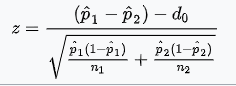

* Two sample Z test of proportions is the test to determine whether the two populations differ significantly on specific characteristics. 
* In other words, compare the proportion of two different populations that have some single characteristics.
***
<b>Assumptions:</b>
* Both populations follow a binomial distribution.
* Samples are independent of each other.
* Test results are accurate when <b>n x p</b> and <b>n x (1 - p)</b> are greater than 5

<b>Important:</b>
* In unpooled method, we hypothesize that there is a specific number of percent difference or not.
    * H0: p1 - p2 = d
    * H1: p1 - p2 != d
***
The difference between pooled and unpooled method is the difference of hypothesis assumptions(null and alternative hypothesis)

In [31]:
# H0: Proportion of hobbyist users under thirty age equals to at least thirty users.
# H1: Proportion of hobbyist users under thirty age is different from at least thirty.
# ----------------------------------------------------------------------------------

import numpy as np
from scipy.stats import norm

In [32]:
p1 = stack_overflow.groupby("age_cat")["hobbyist"].value_counts(normalize = True)[("At least 30", "Yes")]
p2 = stack_overflow.groupby("age_cat")["hobbyist"].value_counts(normalize = True)[("Under 30", "Yes")]

n1 = stack_overflow.groupby("age_cat")["hobbyist"].value_counts()["At least 30"].sum()
n2 = stack_overflow.groupby("age_cat")["hobbyist"].value_counts()["Under 30"].sum()

# numerator_side 
numerator = (p1 - p2) - 0

# standard error
s = (p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2)

standard_error = np.sqrt(s)

z_test = numerator / standard_error

z_test

-4.1984371024335285

In [33]:
# calculate p-value

p_value = 2 * (1 - norm.cdf(abs(z_test), loc=0, scale=1))

p_value

2.6876347940296696e-05

# Chi-squared goodness of fit test:

<b>Chi-square test:</b>
* For testing the population variance against a specified value. ( <b>One variance test</b> )
* Testing goodness of fit of some probability distribution.
* Testing for independence of two attributes. ( Contingency tables. )

<b>Goodness of fit test:</b>
* To test if the sample is coming from a population with specific distribution.
* Other goodness of fit tests are:
    * Anderson-Darling
    * Kolmogorov-Smirnov.

For example, let's say if I am  flipping a coin the expected distribution there is that 50 percent times I should get head, 50 percent times I should get tail. However in the experiment of flipping 100 coin may be a little bit different result. So we can check this with chi-square test there is a hypothesized( specified ) distribution or not.

<b>Formula:</b>

* A chi-square($X^2$) goodness of fit test is a type of Pearson's chi-square test. You can use it to test whether the observed distribution of a categorical variable differs from your expectations.
* It is used to determine whether or not a categorical variable follows a hypothesized distribution.
* Using this test, you can test whether the goodness of fit is <b>good enough</b> to conclude that the population follows the distribution.

* $H_0:$ A variable follows a hypothesized distribution.
* $H_1:$ A variable does not follow a hypothesized distribution.

The p-value corresponds to the test statistics(chi-square) with n-1 degrees of freedom( where n is the number of categories ) is less than your chosen significance level(alpha) then you can reject the null hypothesis.

#### Example :
***
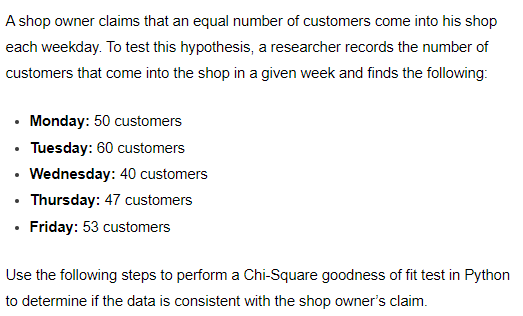

In [34]:
# Step 1 : Create the data

import numpy as np

expected = np.array([50, 50, 50, 50, 50]) # claims that equal number of customers come into shop each weekday.(hypothesis)
observed = np.array([50, 60, 40, 47, 53]) # observed numbers of customers come into shop each weekday.

# Step 2: Perform the chi-square goodness of fit test.

# define alpha.
alpha = 0.05

from scipy.stats import chisquare

chi_square, p_value = chisquare(f_obs=observed, f_exp=expected, ddof=0)

print("chi-square : {}".format(chi_square)); print("p-value : {}".format(p_value))
if p_value < alpha:
    print("Null hypothesis was rejected.")
else:
    print("Fail to reject.")

chi-square : 4.359999999999999
p-value : 0.3594720674366307
Fail to reject.


In [35]:
difference = np.sum(np.square(observed - expected) / expected)

from scipy.stats import chi2

# also you can use chi2.sf() is that the inverse of cumulative distribution function.
# it is stands for survival function.
1 - chi2.cdf(difference, loc=0, scale=1, df=4) # or chi2.sf(<same arguments>)

0.35947206743663074

#### Example from data:

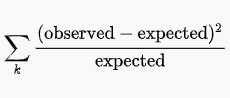

In [36]:
path = "https://assets.datacamp.com/production/repositories/5982/datasets/c59033b93930652f402e30db77c3b8ef713dd701/stack_overflow.feather"

import pandas as pd

stack_overflow = pd.read_feather(path)

stack_overflow.head(3)

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30


In [37]:
stack_overflow["purple_link"].head(10)

0    Hello, old friend
1    Hello, old friend
2    Hello, old friend
3               Amused
4    Hello, old friend
5    Hello, old friend
6    Hello, old friend
7    Hello, old friend
8    Hello, old friend
9              Annoyed
Name: purple_link, dtype: object

In [38]:
# create observed values.
# -----------------------

purple_link_counts = stack_overflow["purple_link"].value_counts().rename_axis("purple_link").reset_index(name="n")
purple_link_counts

,purple_link,n
0,"Hello, old friend",1225
1,Indifferent,405
2,Amused,368
3,Annoyed,263


In [39]:
# create expected values.
# -----------------------

hypothesized = pd.DataFrame({"purple_link": ["Hello, old friend", "Indifferent", "Amused", "Annoyed"],
              "proportion": [1/2, 1/6, 1/6, 1/6]})

hypothesized["n"] = hypothesized["proportion"] * len(stack_overflow)

hypothesized

,purple_link,proportion,n
0,"Hello, old friend",0.500000,1130.500000
1,Indifferent,0.166667,376.833333
2,Amused,0.166667,376.833333
3,Annoyed,0.166667,376.833333


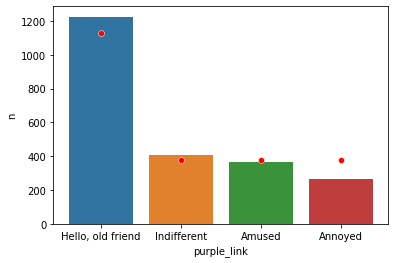

In [40]:
# create visualiztion to show expected and observed values in graph.

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = purple_link_counts, x = "purple_link", y = "n")
sns.scatterplot(data = hypothesized, x = "purple_link", y = "n", color = "red")
plt.show()

In [41]:
# define alpha
significance_level = 0.05

# find chi-square test.

chi_square = np.sum(np.square(purple_link_counts["n"] - hypothesized["n"]) / hypothesized["n"])

# calculate p-value

from scipy.stats import chi2

p_value = 1 - chi2.cdf(chi_square, loc=0, scale = 1, df=len(purple_link_counts)-1)

def check_hypothesis(p_value, alpha):
    if p_value < alpha:
        print(p_value)
        print("Rejected null hypothesis")
        print("The sample does not match with hypothesis distribution")
    else:
        print(p_value)
        print("Fail to reject null hypothesis")
        print("The sample matches with hypothesized distribution")
        
check_hypothesis(p_value, significance_level)

1.1261810373142112e-09
Rejected null hypothesis
The sample does not match with hypothesis distribution


# chi-square test for independence

* The chi-square test of independence is a statistical hypothesis test used to determine whether two categorical or nominal variables are likely to be related or not.
* You can use the test when you have counts of values for two categorical variables.
* We have an idea that two variables are not related. The test gives us a way to decide if our idea is plausible or not.
* It is a non-parametric hypothesis test. Non-parametric tests don't make any assumptions about the data, and are useful when one or more of the common statistical assumptions are violated.(ihlal etmek). However the inferences they make are not as strong as with parametric tests.
***
<b>Assumptions:</b>
* Both variables are categorical.
* Observations are independent.
* The count of each category is greater than 5.
* Each count in the category is mutually exclusive(birbirini dışlayan)
* Data is chosen randonly.

As a summary, it is for testing of independence of two attributes ( Contingency Tables )

Contingency table helps us in finding out the relationship between two discrete variables.

<b>Formula:</b>

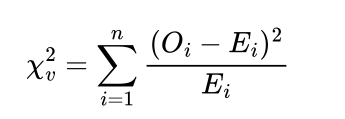

* <b>v</b> is the degrees of freedom.
* <b>O</b> is the observed sample values.
* <b>E</b> is the computed expected values.
* <b>n</b> is the number of categories in the variable.

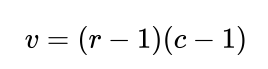

* <b>r</b> is the number of rows in the contingency table.
* <b>c</b> is the number of columns in the contingency table.

<b>Example of contingency table:</b>
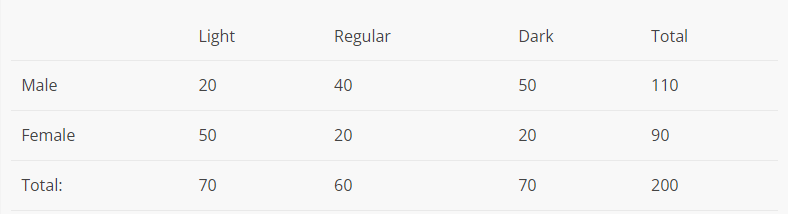

* $H0$: there is no relationship between the row and column variables.(independent variables)
* $H1$: there is a relationship. Alternate hypothesis does not tell what type of relationship exists. ( Not indepedent variables )

<b>Example with python code:</b>

In [1]:
path = "https://assets.datacamp.com/production/repositories/5982/datasets/c59033b93930652f402e30db77c3b8ef713dd701/stack_overflow.feather"

import pandas as pd

stack_overflow = pd.read_feather(path)

stack_overflow.head(3)

# You can use contingency table and pivot table.

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30


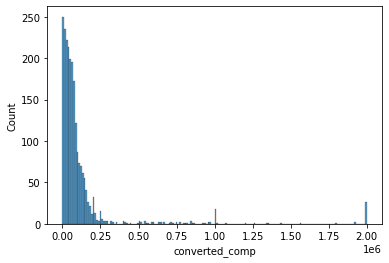

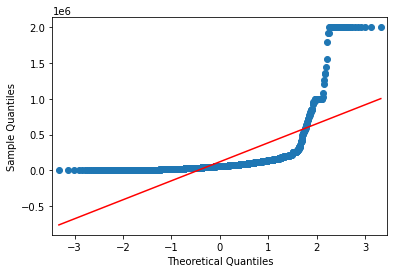

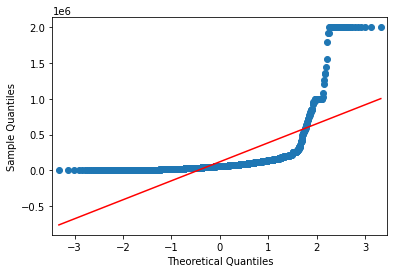

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import qqplot

# stack_overflow.converted_comp


x = stack_overflow["converted_comp"]
mean = stack_overflow["converted_comp"].mean()
std = stack_overflow["converted_comp"].std()
standardized_form = (x - mean) / std

sns.histplot(stack_overflow.converted_comp)
plt.show()

qqplot(data = x, line="s")

In [43]:
# h0: Age categories are independent of job satisfaction levels.
# h1: Age categories are not independent of job satisfaction levels.
# ----------------------------------------------------------------

# define alpha
alpha = 0.01

from scipy.stats import chi2_contingency
import pingouin

# use pingouin library.
expected, observed, stats = pingouin.chi2_independence(data = stack_overflow, x = "job_sat", y = "age_cat")

expected

age_cat,At least 30,Under 30
job_sat,,
Very dissatisfied,73.839009,85.160991
Slightly dissatisfied,158.823529,183.176471
Neither,93.343653,107.656347
Slightly satisfied,315.789474,364.210526
Very satisfied,408.204334,470.795666


In [44]:
observed

age_cat,At least 30,Under 30
job_sat,,
Very dissatisfied,78,81
Slightly dissatisfied,160,182
Neither,87,114
Slightly satisfied,296,384
Very satisfied,429,450


In [45]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.552373,4.0,0.235164,0.049555,0.437417
1,cressie-read,0.666667,5.554106,4.0,0.235014,0.049563,0.437545
2,log-likelihood,0.000000,5.558529,4.0,0.234632,0.049583,0.437871
3,freeman-tukey,-0.500000,5.562688,4.0,0.234274,0.049601,0.438178
4,mod-log-likelihood,-1.000000,5.567570,4.0,0.233854,0.049623,0.438538
5,neyman,-2.000000,5.579519,4.0,0.232828,0.049676,0.439419


# One Variance Test:

### Conditions for one-variance test:
* Random samples.
* Each observation should be independent of other.
      * Sampling with replacement.
      * If sampling without replacement, the sample size should not be more than 10 % of the population.
* Data follows a Normal Distribution.

### What is one-variance test:
* In this test,  we want to check whether the sample standard deviation or variance is equal to or not equal to the population variance.
* So, we want to compare the sample variance with the population variance.

### Variance tests:
1. <b>Chi-square tests</b>
      * For testing the population variance against a specificied value.
      * testing goodness of fit of some probability distribution.
      * testing for independence of 2 attributes( Contingency tables )
      
2. <b>F-test</b>
      * for testing equality of two variances from different populations.
      * for testing equality of several means with technique of ANOVA.
***
<b>Note:</b> As a summary, one-variance test is used in chi-square, and two-variance test is used in F-test.

<b>Formula for one-variance test:(Chi-square - $x^2$)</b>
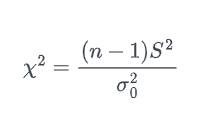

### One-variance test Example 1:

* A sample of 51 bottles was selected. The standard deviation of these 51 bottles was 2.35 cc. Has it increased from established 2 cc ?. 90 % confidence level. What is the critical value of Chi-square for 50 degrees of freedom ?

In [12]:
# H0: s^2 <= q^2
# H1: s^2 > q^2

n = 51 
standard_deviation = 2.35
population_standard_deviation = 2
alpha = 0.1

from scipy.stats import chi2
import numpy as np

test = (n - 1) * np.square(2.35) / np.square(2)

# right tailed test. (Does it have increase or not ?)
# sf(x, df, loc=0, scale=1
p_value = chi2.sf(test, df=50, loc=0, scale=1)

# compare with alpha ( if true reject the null hypothesis.)
print(p_value < alpha)
print(p_value)
print(test)

True
0.038440502971046564
69.03125000000001


In [15]:
# H0: s^2 = q^2
# H1: s^2 != q^2

p_value = 2 * chi2.sf(test, df=50, loc=0, scale=1)

p_value

print(p_value < alpha)
print(p_value)

True
0.07688100594209313


In [18]:
# Visualize the chi-square distribution of data

x_ax = np.linspace(1, 100, 100)
x_ax

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [19]:
y_ay = chi2.pdf(x_ax, df=50)

y_ay

array([2.91338042e-32, 2.96462558e-25, 3.02700284e-21, 1.82976479e-18,
       2.35011080e-16, 1.13315939e-14, 2.77886028e-13, 4.15457113e-12,
       4.25637120e-11, 3.23647330e-10, 1.93352251e-09, 9.46514893e-09,
       3.91986185e-08, 1.40784850e-07, 4.47224968e-07, 1.27663917e-06,
       3.31753456e-06, 7.93294099e-06, 1.76129979e-05, 3.65863863e-05,
       7.15674349e-05, 1.32571288e-04, 2.33682377e-04, 3.93622990e-04,
       6.35950953e-04, 9.88727298e-04, 1.48354004e-03, 2.15384499e-03,
       3.03267869e-03, 4.14989705e-03, 5.52917863e-03, 7.18508992e-03,
       9.12052932e-03, 1.13248447e-02, 1.37728580e-02, 1.64249396e-02,
       1.92281677e-02, 2.21184964e-02, 2.50237625e-02, 2.78672807e-02,
       3.05717374e-02, 3.30630785e-02, 3.52741056e-02, 3.71475411e-02,
       3.86383815e-02, 3.97154342e-02, 4.03620024e-02, 4.05757513e-02,
       4.03678438e-02, 3.97614757e-02, 3.87899640e-02, 3.74945509e-02,
       3.59220852e-02, 3.41227216e-02, 3.21477612e-02, 3.00477248e-02,
      

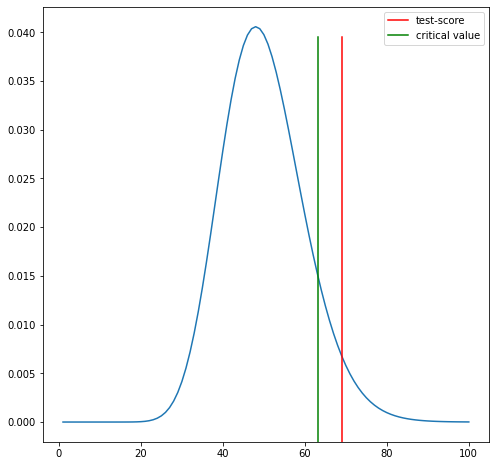

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.lineplot(x = x_ax, y = y_ay)
plt.axvline(x = test, ymin = 0, ymax = 0.93, color = "red", label = "test-score")
plt.axvline(x = chi2.ppf(0.9, df=50), ymin = 0, ymax = 0.93, color = "green", label = "critical value")
plt.legend()
plt.show()

In [65]:
chi2.ppf(0.9, df=50)

63.167121005726315

In [66]:
chi2.isf(0.10, df=50)

63.167121005726315

# Two variances test:

### Conditions for two-variance test:
* Random samples.
* Each observation should be independent of other.
      * Sampling with replacement.
      * If sampling without replacement, the sample size should not be more than 10 % of the population.
* Data follows a Normal Distribution.

* <b>F-test</b>
      * for testing equality of two variances from different populations.

<b>Formula:</b>
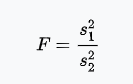

### Example question:

We took 8 samples from machine A and the standard deviation was 1.1. For machine B we took 5 samples and the variance was 11.  Is there a difference in variance at 90 % confidence evel ?

In [38]:
# H0: Q1^2 = Q2^2
# H1: Q1^2 != Q2^2

std_a = 1.1**2
std_b = 11

f_score = std_b / std_a


f_score

9.09090909090909

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f

In [128]:
# we will use isf() function to find f-critical value.
# f.isf(q, dfn, dfd, loc=0, scale=1) | Insverse survival function.(sf)(1 - cdf)

# alpha = 0.1 | two-tailed : alpha / 2
right_side = f.isf(0.05, dfn = 4, dfd = 7) # for right side.

left_side = f.isf(0.95, dfn = 4, dfd = 7) # for left side.

right_side,left_side

(4.120311726897633, 0.1640901524729093)

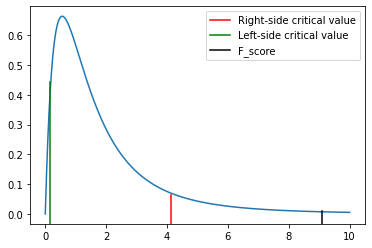

In [127]:
dfn, dfd = 4, 7

ax = np.linspace(0, 10, 1000)
ay = f.pdf(x, dfn = 4, dfd = 7)


sns.lineplot(x = ax, y = ay)
plt.axvline(x = right_side, ymin=0, ymax = 0.131, color = "red", label = "Right-side critical value")
plt.axvline(x = left_side, ymin = 0, ymax = 0.65, color = "green", label = "Left-side critical value")
plt.axvline(x = f_score, ymin = 0, ymax = 0.059, color = "black", label = "F_score")

plt.legend()
plt.show()

In [129]:
# Bartlett's test : is used to test homoscedascity. 
# (That is f multiple sameples are from populations with equal variances)
# we know that some statistical tests, such as analysis of variance, assume -
# that variances are equal accross groups, which can be verififed -
# with Bartlet's test.

# Bartlett's test is sensitive to departures from normality. 
# That is, if the samples come from non-normal distributions,
# then Bartlett's test may simply be testing for non-normality.
# Levene's test and the Brown–Forsythe test are alternatives to 
# the Bartlett test that are less sensitive to departures from normality.

In [140]:
m1 = [150, 150, 151, 148, 151, 152, 149, 150]
m2 = [135, 152, 154, 169, 157]

alpha = 0.1

stat, p_value = stats.bartlett(m1, m2)

p_value

1.2367317910523616e-05

In [142]:
[np.var(x, ddof=1) for x in [m1, m2]]

[1.5535714285714286, 149.3]

In [143]:
# Levene test : it is an inferential statistic used to assess the equa-
# lity of variances for a variable calculated for two or more groups.

# Some common statistical procedures assume that variances of the popu -
# lations from which different samples are drawn are equal.
# Levene's test assesses this assumption.

stats.levene(m1, m2) # much stronger much robust when it is compared with bartlett test

LeveneResult(statistic=5.416245804750017, pvalue=0.040060452607943706)

# ANOVA:

* Before conducting ANOVA, you can visualize the samples with box and whisker plot.
***
<b>F-test</b>:
   * For testing equality of two variances from different populations.
   * For testing equality of several means with tecnique of ANOVA.

### T-test vs ANOVA:

#### T-test:
* $H_0$: $\mu_A$ = $\mu_B$
* $H_a$: $\mu_A$ != $\mu_B$

#### ANOVA:
* $H_0$: $\mu_A$ = $\mu_B$ = $\mu_C$ = $\mu_D$ ..... = $\mu_K$
* $H_a$: At least one of the means is different from others.

ANOVA tells you is that one of these means is different from others. We can use Post-hoc test for which one of these groups are different.

### Why ANOVA ?


* We used t-test to compare the means of two populations.
* What if we need to compare more than two populations ? With ANOVA we can find out if one or more populations have different mean or comes from a different population.
* We could have conducted multiple t test.
* How many t-test we need to conduct if have to compare 4 sample means? (6)
* Each test is done with alpha = 0.05 or 95 % confidence.
* 6 tests will result in confidence level of <b>0.95 x 0.95 x 0.95 x 0.95 x 0.95 x 0.95 = 0.735</b>
* If you do 20 tests, 20 comparisons, one of those comparisons would be the wrong conclusion.

### Mathematical repres.

* Anova is Analysis of Variance.
***
<b>Formula for variance:</b>
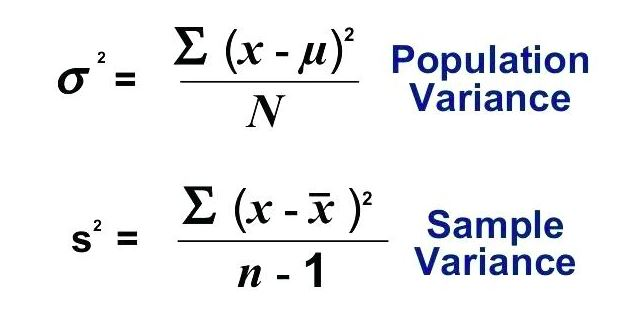

* Numerator of this formula is Sum of Squares(SS), the denominator is the degrees of freedom(df) for the sample.
* <b>Formula: </b> SS / df

<b>Formula for f-test:</b>
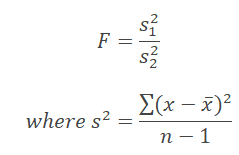

* $SS_1$ / $df_1$ = $MSS_1$
* $SS_2$ / $df_2$ = $MSS_2$

$F$ = $MSS_1$ / $MSS_2$

<b>Formula for ANOVA:</b>
* $F$ = $MSS_{between}$ / $MSS_{within}$

$F$ = ($SS_{between}$ / $df_{between}$) $/$ ($SS_{within}$ / $df_{within}$)

$SST$ = $SS_{between}$ + $SS_{within}$

### ANOVA manuel calculation:

In [1]:
machine_1 = [150, 151, 152, 152, 151, 150]
machine_2 = [153, 152, 148, 151, 149, 152]
machine_3 = [156, 154, 155, 156, 157, 155]

# H0:  u_1 = u_2 = u_3
# H1:  Means are not all equal.(there is at least one machine which has a different meaning.)
# Check at 95 % confidence level.(alpha is 0.05)

In [19]:
import numpy as np

# Step 1: calculate SS_within.(SS_1 + SS_2 + SS_3)

def SS_within(sample1, sample2, sample3):
    
    # Calculate the mean of each sample
    sample_1_mean = np.mean(sample1)
    sample_2_mean = np.mean(sample2)
    sample_3_mean = np.mean(sample3)
    
    # Calculate the SS of each sample
    SS_1 = sum(np.square(np.array(sample1) - sample_1_mean))
    SS_2 = sum(np.square(np.array(sample2) - sample_2_mean))
    SS_3 = sum(np.square(np.array(sample3) - sample_3_mean))
    
    # Calculate SS_within.
    SS_within = SS_1 + SS_2 + SS_3
    
    return SS_within

# Step 2: calculate SS_between : 
# 1. (calculate overall mean of samples and create means variable)
# 2. (calculate sum of squares of means variable and multiply by length of samples.)

def SS_between(sample1, sample2, sample3):
    
    # calculate the means of each sample
    m1 = np.mean(sample1)
    m2 = np.mean(sample2)
    m3 = np.mean(sample3)
    
    # calculate the overall mean.
    overall_mean = (m1 + m2 + m3) / 3
    
    # calulate the distance of each sample mean to the overall mean -
    # take the square and multiply by number of items in each sample.
    ss_between1 = np.square(m1 - overall_mean) 
    ss_between2 = np.square(m2 - overall_mean) 
    ss_between3 = np.square(m3 - overall_mean)
    
    # there are six items in each sample.
    SS_between = (ss_between1 + ss_between2 + ss_between3) * 6
    
    return SS_between

SS_between(machine_1, machine_2, machine_3)

# Step 3: Total Degrees of freedom.
# Total df = df_between + df_within.
# df_between = 3 - 1 = 2
# df_total = 18 - 1 = 17
# df_within = (17 - 2) = 15

def find_ddof(sample1, sample2, sample3):
    samples = [sample1, sample2, sample3]
    
    df_total = sum([len(l) for l in samples]) - 1
    df_between = len(samples) - 1
    df_within = df_total - df_between
    
    return df_between, df_within

# Step 4: calculate f value for anova.
# find mss_between.
# find mss_within.
# f = mss_between / mss_within

def F(sample1, sample2, sample3):
    
    # find SS_between
    ss_between = SS_between(sample1, sample2, sample3)
    # find SS_within
    ss_within = SS_within(sample1, sample2, sample3)
    # find df_between and df_within
    df_between, df_within = find_ddof(sample1, sample2, sample3)
    
    # calculate mss_between and mss_within
    mss_between = ss_between / df_between
    mss_within = ss_within / df_within
    
    # find f-value. (mss_between / mss_within)
    f = mss_between / mss_within
    
    return f

F(machine_1, machine_2, machine_3)

22.26470588235289

In [20]:
# Step 2 is to find f-critical value.
# Theoretical we can find the f-critical value on the f-table.
# F_0.05, 2, 15 (confidence level, df_between(numerator), df_within(denominator))
# F 0.05, 2, 15 = 3.68 (one tail)
# ANOVA is always one tail test.

# F-value = 22.26
# F-critical = 3.68

# Reject the null hypothesis since the f-value is in the field of rejection region.
# This means one of the mean of samples is different than others' mean.

In [21]:
# Do these same process using python libraries:

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.oneway as oneway

In [23]:
# We are doing one-way anova.

In [26]:
m1 = [150, 151, 152, 152, 151, 150]
m2 = [153, 152, 148, 151, 149, 152]
m3 = [156, 154, 155, 156, 157, 155]

In [31]:
statistic, p_value = stats.f_oneway(m1, m2, m3)

print((statistic, p_value)); print(p_value < 0.05)

(22.264705882352935, 3.2374085509077445e-05)
True


In [36]:
# using statsmodels library.
oneway.anova_oneway(data = (m1, m2, m3), use_var = "equal")

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 22.264705882352896
pvalue = 3.237408550907777e-05
df = (2.0, 15.0)
df_num = 2.0
df_denom = 15.0
nobs_t = 18.0
n_groups = 3
means = array([151.        , 150.83333333, 155.5       ])
nobs = array([6., 6., 6.])
vars_ = array([0.8       , 3.76666667, 1.1       ])
use_var = 'equal'
welch_correction = True
tuple = (22.264705882352896, 3.237408550907777e-05)

In [37]:
# Let's we do the anavo on a dataset.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.oneway as oneway

In [40]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [67]:
mpg = sns.load_dataset("mpg")

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [43]:
mpg.groupby("origin").mean() # mpg = miles per galon.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.891429,4.157143,109.142857,80.558824,2423.300000,16.787143,75.814286
japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
usa,20.083534,6.248996,245.901606,119.048980,3361.931727,15.033735,75.610442


In [51]:
mpg.groupby(["origin", "cylinders"]).mean()

mpg  displacement  horsepower       weight  \
origin cylinders                                                     
europe 4          28.411111    104.222222   78.311475  2330.015873   
       5          27.366667    145.000000   82.333333  3103.333333   
       6          20.100000    159.750000  113.500000  3382.500000   
japan  3          20.550000     72.500000   99.250000  2398.500000   
       4          31.595652     99.768116   75.579710  2153.492754   
       6          23.883333    156.666667  115.833333  2882.000000   
usa    4          27.840278    124.284722   80.956522  2437.166667   
       6          19.663514    226.283784   99.671233  3213.905405   
       8          14.963107    345.009709  158.300971  4114.718447   

                  acceleration  model_year  
origin cylinders                            
europe 4             16.722222   75.507937  
       5             18.633333   79.000000  
       6             16.425000   78.250000  
japan  3             13.250000   75.500000  
       4             16.569565   77.507246  
       6             13.550000   78.000000  
usa    4             16.526389   78.027778  
       6             16.474324   75.635135  
       8             12.955340   73.902913

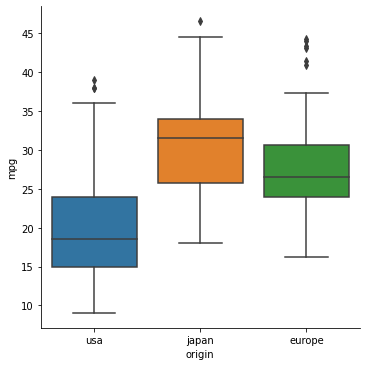

In [54]:
sns.catplot(data = mpg, x = "origin", y = "mpg", kind = "box")
plt.show()

In [56]:
mpg[mpg["cylinders"] == 4]["mpg"]

14     24.0
18     27.0
19     26.0
20     25.0
21     24.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 204, dtype: float64

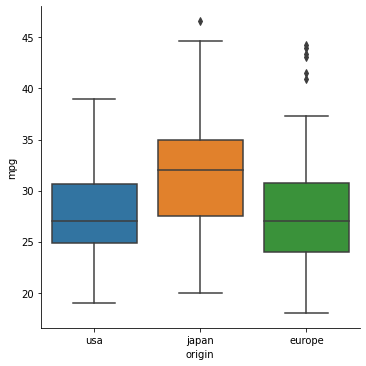

In [57]:
sns.catplot(data = mpg, x = "origin", y = mpg[mpg["cylinders"] == 4]["mpg"], kind = "box")
plt.show()

In [61]:
eu = mpg[(mpg["cylinders"] == 4) & (mpg["origin"] == "europe")]["mpg"]
jp = mpg[(mpg["cylinders"] == 4) & (mpg["origin"] == "japan")]["mpg"]
us = mpg[(mpg["cylinders"] == 4) & (mpg["origin"] == "usa")]["mpg"]

In [63]:
statistic, p_value = stats.f_oneway(eu, jp, us)
p_value

0.00012379894210177303

In [64]:
alpha = 0.05
p_value < alpha

True

In [ ]:
# I can say that there is a significant difference in the Miles per Galon -
# for cars produced in Europe, Japan, and USA.

# Post Hoc Test ( Tuckey's HSD )

Post hoc tests attempt to control the experimentwise error rate(usually alpha = 0.05) just like one way ANOVA is used instead of multiple t-tests.

One popular test is Tukey's Test. Other tests include:

In [65]:
import statsmodels.stats.oneway as oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [68]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [71]:
df = mpg[mpg["cylinders"] == 4][["mpg", "origin"]]
    
df.head(10)   

,mpg,origin
14,24.0,japan
18,27.0,japan
19,26.0,europe
20,25.0,europe
21,24.0,europe
22,25.0,europe
23,26.0,europe
29,27.0,japan
30,28.0,usa
31,25.0,japan


In [73]:
result = pairwise_tukeyhsd(endog=df["mpg"], groups = df["origin"], alpha = 0.05 )

In [75]:
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
europe  japan   3.1845  0.003  0.9267  5.4423   True
europe    usa  -0.5708 0.8186 -2.8061  1.6644  False
 japan    usa  -3.7554 0.0002 -5.9382 -1.5726   True
----------------------------------------------------


In [77]:
m13 = pd.concat([
pd.DataFrame(data = {"volume": m1, "machine": "Machine1"}),
pd.DataFrame(data = {"volume": m2, "machine": "Machine2"}),
pd.DataFrame(data = {"volume": m3, "machine": "Machine3"})
])

m13.head()

,volume,machine
0,150,Machine1
1,151,Machine1
2,152,Machine1
3,152,Machine1
4,151,Machine1


In [79]:
result1 = pairwise_tukeyhsd(endog = m13["volume"], groups = m13["machine"], alpha=0.05)

print(result1)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
Machine1 Machine2  -0.1667  0.976 -2.2277 1.8944  False
Machine1 Machine3      4.5 0.0001  2.4389 6.5611   True
Machine2 Machine3   4.6667 0.0001  2.6056 6.7277   True
-------------------------------------------------------


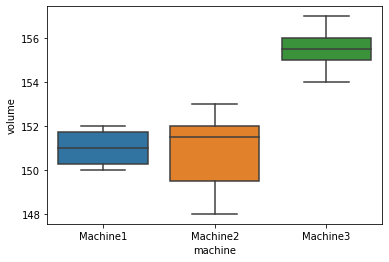

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data = m13, x = "machine", y = "volume")
plt.show()